In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', size=16)

In [2]:
df = pd.read_csv('bank.csv', sep=';', na_values=['unknown', 'other'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [3]:
print('Number of rows:', len(df), '\n')

df.isnull().sum()*100/len(df)

Number of rows: 45211 



age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     85.817611
y             0.000000
dtype: float64

In [4]:
df.drop(columns=['contact', 'poutcome'], inplace=True)
df.dropna(inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no


In [5]:
print('Number of rows:', len(df), '\n')

df.isnull().sum()*100/len(df)

Number of rows: 43193 



age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
y            0.0
dtype: float64

In [6]:
le_job = LabelEncoder()
df['job'] = le_job.fit_transform(df['job'])

le_marital = LabelEncoder()
df['marital'] = le_marital.fit_transform(df['marital'])

le_education = LabelEncoder()
df['education'] = le_education.fit_transform(df['education'])

le_default = LabelEncoder()
df['default'] = le_default.fit_transform(df['default'])

le_housing = LabelEncoder()
df['housing'] = le_housing.fit_transform(df['housing'])

le_loan = LabelEncoder()
df['loan'] = le_loan.fit_transform(df['loan'])

le_month = LabelEncoder()
df['month'] = le_month.fit_transform(df['month'])

le_y = LabelEncoder()
df['y'] = le_y.fit_transform(df['y'])

In [7]:
def normalize(v):
    return (v - v.min()) / (v.max() - v.min())

df['age'] = normalize(df['age'])

df['balance'] = normalize(df['balance'])

df['day'] = normalize(df['day'])

df['duration'] = normalize(df['duration'])

df['campaign'] = normalize(df['campaign'])

df['pdays'] = normalize(df['pdays'])

df['previous'] = normalize(df['previous'])

Number of rows: 43193


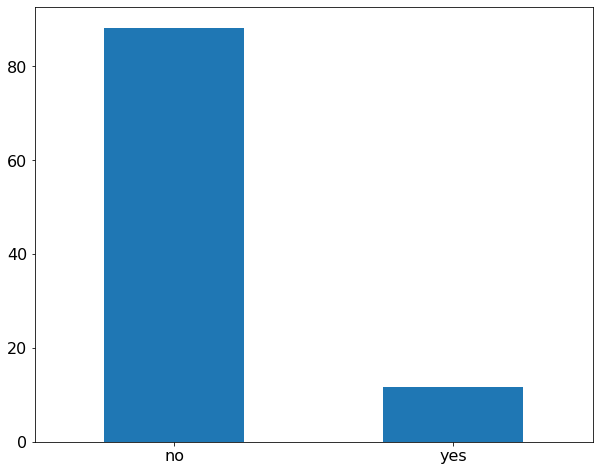

In [8]:
X = df.drop(columns='y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

print('Number of rows:', len(y_train) + len(y_test))

plt.figure(figsize=(10, 8))
(y_train.value_counts(normalize=True) * 100).plot.bar().set_xticklabels(['no', 'yes'], rotation=0);

Number of rows: 76344
Train size: 53440
Test size: 22904


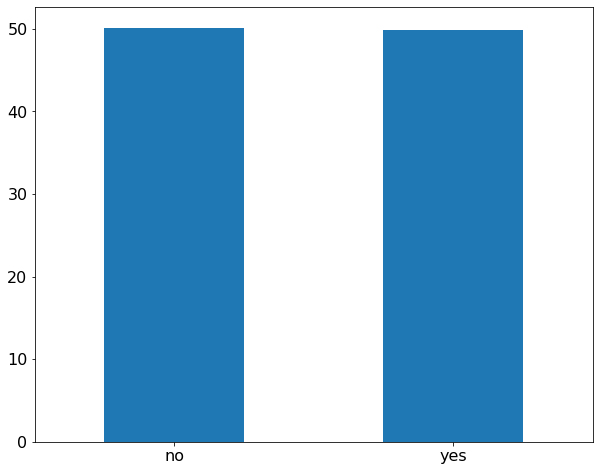

In [9]:
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, shuffle=True)

print('Number of rows:', len(y_train) + len(y_test))
print('Train size:', len(y_train))
print('Test size:', len(y_test))

plt.figure(figsize=(10, 8))
(y_train.value_counts(normalize=True) * 100).plot.bar().set_xticklabels(['no', 'yes'], rotation=0);

Naive Bayes

Accuracy:
75.20957038071953 %

Confusion matrix:


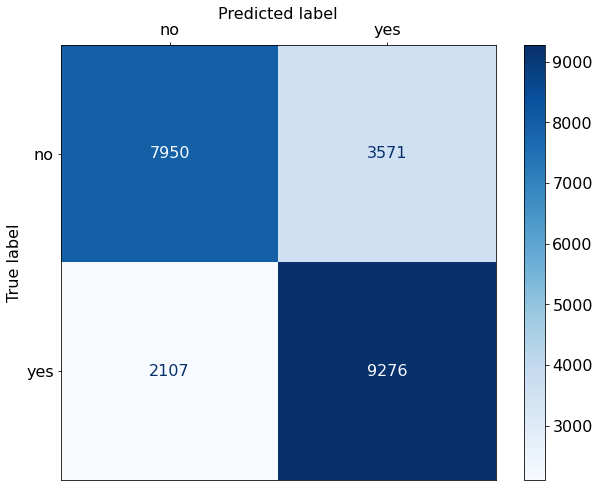

In [10]:
# Naive Bayes

gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_pred)

print('Naive Bayes')
print('\nAccuracy:')
print(gnb_acc * 100, '%')
print('\nConfusion matrix:')
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['no', 'yes'], cmap='Blues', values_format='', ax=ax);
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

Decision Tree

Accuracy:
95.69070904645477 %

Confusion matrix:


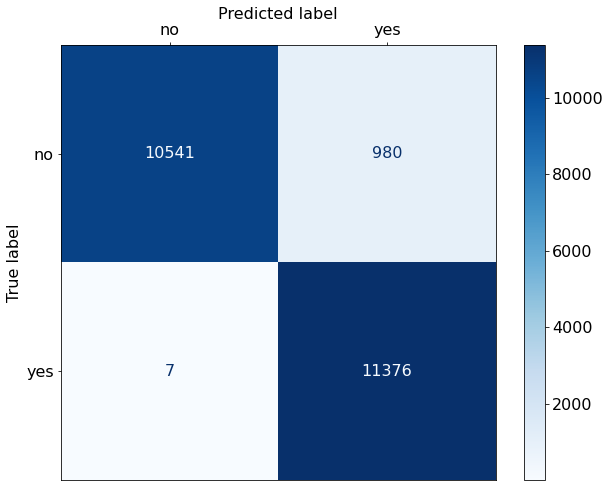

In [11]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc_pred = dtc.fit(X_train, y_train).predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)

print('Decision Tree')
print('\nAccuracy:')
print(dtc_acc * 100, '%')
print('\nConfusion matrix:')
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(dtc, X_test, y_test, display_labels=['no', 'yes'], cmap='Blues', values_format='', ax=ax);
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

KNN 5

Accuracy:
89.2507858889277 %

Confusion matrix:


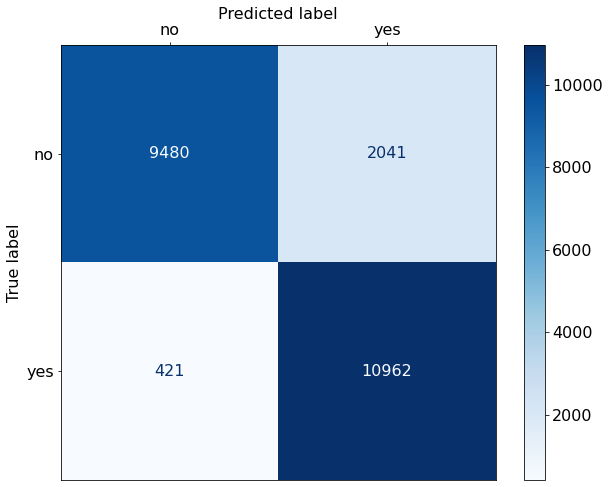

In [12]:
# KNN

knn = KNeighborsClassifier()
knn_pred = knn.fit(X_train, y_train).predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print('KNN 5')
print('\nAccuracy:')
print(knn_acc * 100, '%')
print('\nConfusion matrix:')
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(knn, X_test, y_test, display_labels=['no', 'yes'], cmap='Blues', values_format='', ax=ax);
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

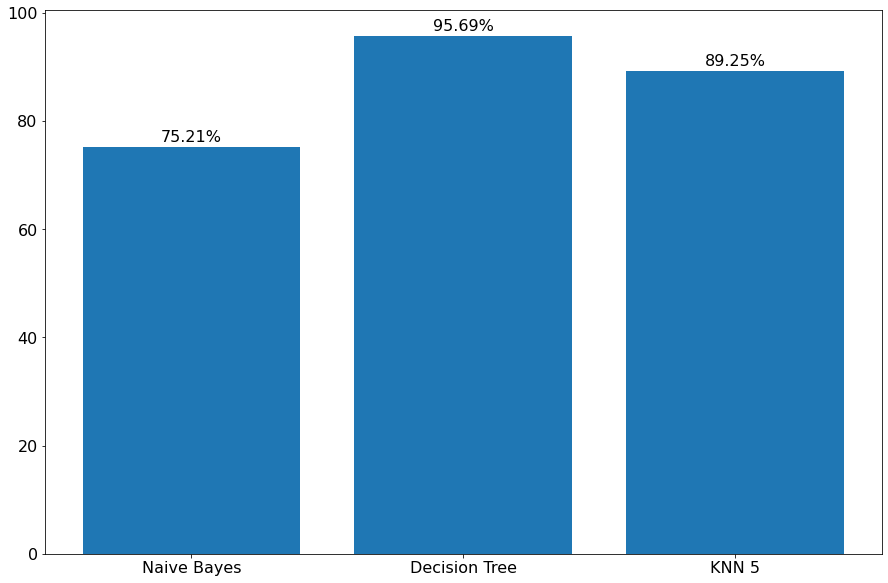

In [13]:
plt.figure(figsize = (15, 10))
plt.bar(['Naive Bayes', 'Decision Tree', 'KNN 5'], [gnb_acc * 100, dtc_acc * 100, knn_acc * 100])
plt.text(0, gnb_acc * 100 + 1, f'{gnb_acc * 100:.2f}%', ha='center')
plt.text(1, dtc_acc * 100 + 1, f'{dtc_acc * 100:.2f}%', ha='center')
plt.text(2, knn_acc * 100 + 1, f'{knn_acc * 100:.2f}%', ha='center')
plt.show()

Tree depth: 34


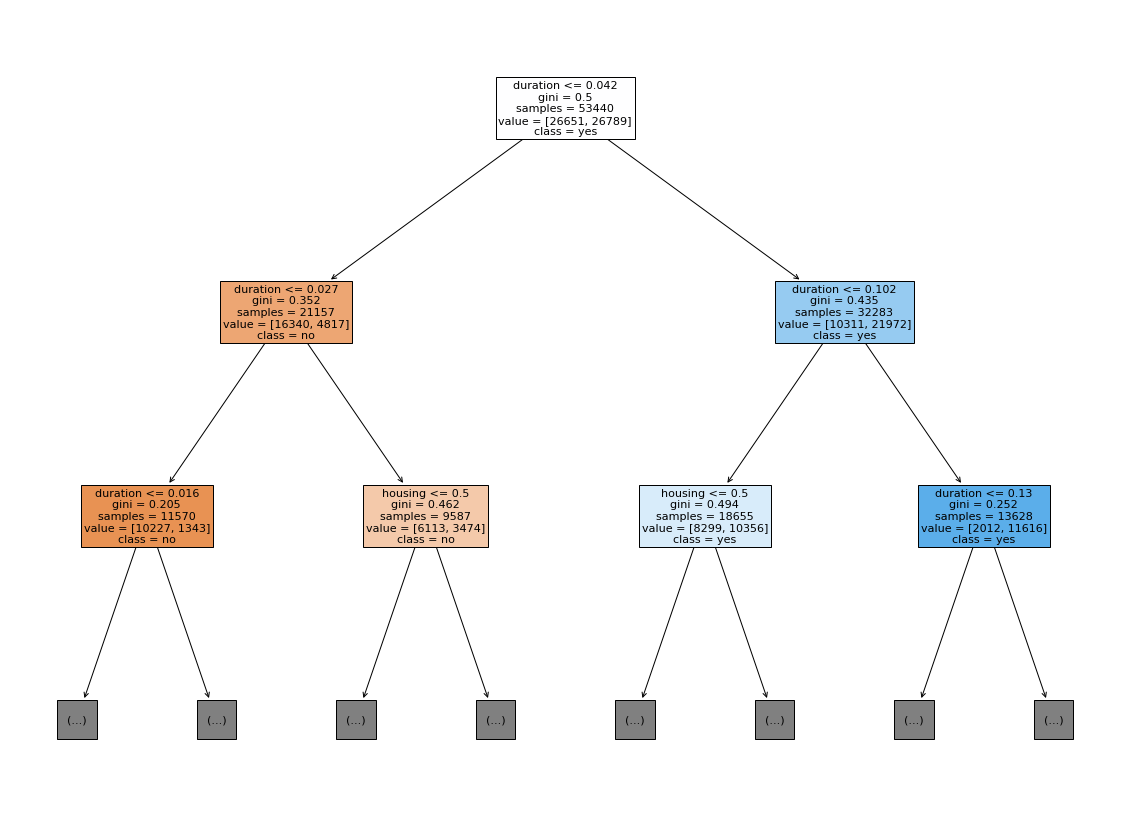

In [14]:
plt.figure(figsize=(20, 15))
plot_tree(dtc, max_depth=2, feature_names=list(X_res), class_names=['no', 'yes'], filled=True);
print('Tree depth:', dtc.tree_.max_depth)

In [15]:
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_res, y_res, test_size=0.5, shuffle=True)

gnb_acc_50_50 = accuracy_score(y_test_50, GaussianNB().fit(X_train_50, y_train_50).predict(X_test_50))
dtc_acc_50_50 = accuracy_score(y_test_50, DecisionTreeClassifier().fit(X_train_50, y_train_50).predict(X_test_50))
knn_acc_50_50 = accuracy_score(y_test_50, KNeighborsClassifier().fit(X_train_50, y_train_50).predict(X_test_50))

X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X_res, y_res, test_size=0.1, shuffle=True)

gnb_acc_90_10 = accuracy_score(y_test_10, GaussianNB().fit(X_train_90, y_train_90).predict(X_test_10))
dtc_acc_90_10 = accuracy_score(y_test_10, DecisionTreeClassifier().fit(X_train_90, y_train_90).predict(X_test_10))
knn_acc_90_10 = accuracy_score(y_test_10, KNeighborsClassifier().fit(X_train_90, y_train_90).predict(X_test_10))

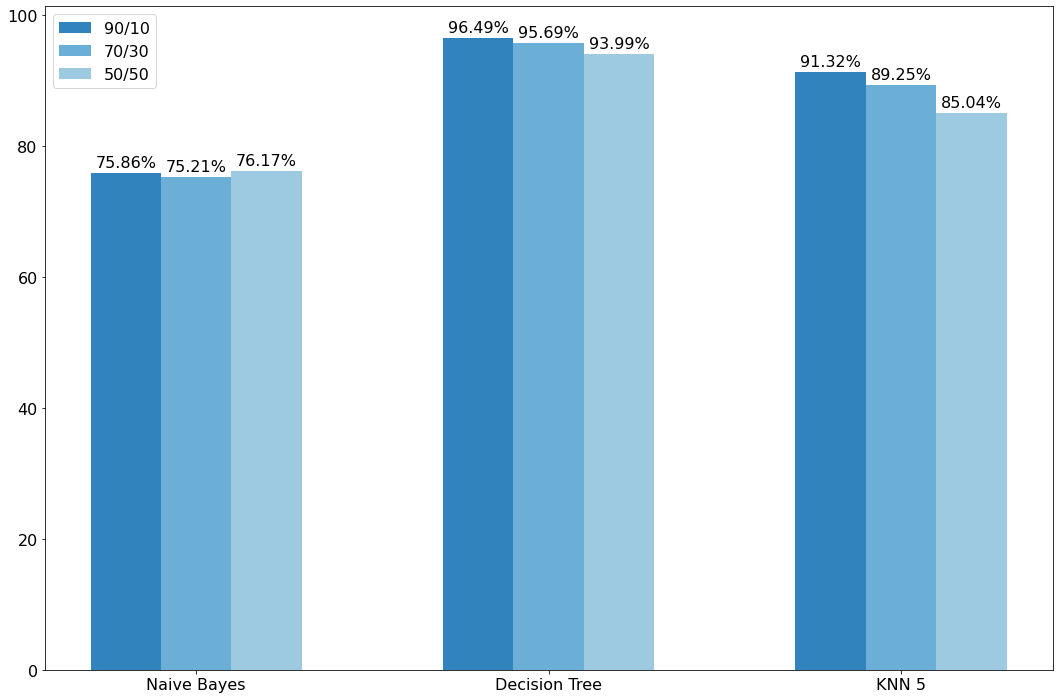

In [16]:
labels = ['Naive Bayes', 'Decision Tree', 'KNN 5']
acc_90_10 = [gnb_acc_90_10 * 100, dtc_acc_90_10 * 100, knn_acc_90_10 * 100]
acc_70_30 = [gnb_acc * 100, dtc_acc * 100, knn_acc * 100]
acc_50_50 = [gnb_acc_50_50 * 100, dtc_acc_50_50 * 100, knn_acc_50_50 * 100]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width, acc_90_10, width, color='#3083bd', label='90/10')
rects2 = ax.bar(x, acc_70_30, width, color='#6bafd7', label='70/30')
rects3 = ax.bar(x + width, acc_50_50, width, color='#9ecae1', label='50/50')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')

ax.bar_label(rects1, labels=[f'{gnb_acc_90_10 * 100:.2f}%', f'{dtc_acc_90_10 * 100:.2f}%', f'{knn_acc_90_10 * 100:.2f}%'], padding=3)
ax.bar_label(rects2, labels=[f'{gnb_acc * 100:.2f}%', f'{dtc_acc * 100:.2f}%', f'{knn_acc * 100:.2f}%'], padding=3)
ax.bar_label(rects3, labels=[f'{gnb_acc_50_50 * 100:.2f}%', f'{dtc_acc_50_50 * 100:.2f}%', f'{knn_acc_50_50 * 100:.2f}%'], padding=3)

fig.tight_layout()

plt.show()